In [75]:
import cogsworth
import gala.potential as gp
import numpy as np
import matplotlib.pyplot as plt
import astropy.units as u
import pandas as pd

In [76]:
# this all just makes plots look nice
%config InlineBackend.figure_format = 'retina'

plt.rc('font', family='serif')
plt.rcParams['text.usetex'] = False
fs = 24

# update various fontsizes to match
params = {'figure.figsize': (12, 8),
          'legend.fontsize': fs,
          'axes.labelsize': fs,
          'xtick.labelsize': 0.9 * fs,
          'ytick.labelsize': 0.9 * fs,
          'axes.linewidth': 1.1,
          'xtick.major.size': 7,
          'xtick.minor.size': 4,
          'ytick.major.size': 7,
          'ytick.minor.size': 4}
plt.rcParams.update(params)

# this makes sure every column in Pandas dataframes is shown
pd.set_option('display.max_columns', None)

In [77]:
# set the random seed for reproducibility
np.random.seed(117)

# Part 1: Your first population

## Demo

### Initialise a Population

In [78]:
p = cogsworth.pop.Population(
    n_binaries=100,
    use_default_BSE_settings=True
)
p

<Population - 100 systems - galactic_potential=MilkyWayPotential, SFH=Wagg2022>

### Initial sampling

In [79]:
p.sample_initial_binaries()

In [80]:
p.initial_binaries.head()

,index,kstar_1,kstar_2,mass_1,mass_2,porb,ecc,metallicity,tphysf,mass0_1,mass0_2,rad_1,rad_2,lum_1,lum_2,massc_1,massc_2,radc_1,radc_2,menv_1,menv_2,renv_1,renv_2,omega_spin_1,omega_spin_2,B_1,B_2,bacc_1,bacc_2,tacc_1,tacc_2,epoch_1,epoch_2,tms_1,tms_2,bhspin_1,bhspin_2,tphys,binfrac
0,0,1.0,1.0,1.023699,0.846729,200.238245,0.584425,0.008227,10166.590613,1.023699,0.846729,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5
1,1,0.0,0.0,0.511650,0.509950,86.006966,0.249694,0.008741,7913.923443,0.511650,0.509950,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5
2,2,0.0,0.0,0.171123,0.080835,118.918317,0.218968,0.002577,11797.415834,0.171123,0.080835,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5
3,3,0.0,0.0,0.248562,0.163282,3191.947642,0.062489,0.003930,7696.724988,0.248562,0.163282,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5
4,4,0.0,0.0,0.163609,0.135845,1.777714,0.107270,0.007760,9120.470488,0.163609,0.135845,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5


In [81]:
p.initial_galaxy

<Wagg2022, size=126>

In [82]:
print(p.initial_galaxy.positions)
print(p.initial_galaxy.tau)

[[ 1.37663696e+00  4.44284278e+00  7.20054994e-01 -2.87353341e+00
   2.71049613e+00 -5.01795565e+00  2.68254513e+00 -2.11025967e+00
  -4.57216056e+00 -8.67465697e+00 -5.27895870e-01  6.34899617e-01
  -8.01945115e+00 -2.91543537e+00  3.86559188e-01 -2.99487279e+00
   4.99423644e+00  1.02594003e+01  8.35987557e-01  1.01421967e+01
   1.56669197e+00 -1.37713634e-01 -3.47288369e+00  1.65854000e+00
   4.52042944e+00 -2.00977495e+00 -1.65973248e+01 -8.08415548e+00
  -1.21237673e+01 -4.17023517e+00  1.07948725e+00  1.58141697e+01
  -3.51388328e+00 -2.75839498e+00  1.97775827e+00 -1.48728254e+00
   3.44213596e+00 -2.49700799e+00 -3.79199996e+00 -4.28804062e+00
  -2.34615428e+00 -1.05676163e+00  8.85103146e+00 -2.30748512e+00
   5.36704160e+00  3.78997526e+00  1.97494680e-02 -5.60738430e+00
   2.01942232e-01 -1.66759551e+00 -3.50847802e-01 -1.87591959e-02
  -2.82168165e+00  2.65180520e+00 -1.99685990e+00  8.13693474e-01
  -6.73040724e-01 -1.57516916e+01 -8.08836949e+00 -7.49011073e+00
   4.36171

### Stellar evolution

In [83]:
p.perform_stellar_evolution()

In [84]:
p.bpp

,tphys,mass_1,mass_2,kstar_1,kstar_2,sep,porb,ecc,RRLO_1,RRLO_2,evol_type,aj_1,aj_2,tms_1,tms_2,massc_he_layer_1,massc_he_layer_2,massc_co_layer_1,massc_co_layer_2,rad_1,rad_2,mass0_1,mass0_2,lum_1,lum_2,teff_1,teff_2,radc_1,radc_2,menv_1,menv_2,renv_1,renv_2,omega_spin_1,omega_spin_2,B_1,B_2,bacc_1,bacc_2,tacc_1,tacc_2,epoch_1,epoch_2,bhspin_1,bhspin_2,bin_num
0,0.000000,1.023699,0.846729,1,1,177.404084,200.238245,0.584425,0.031668,0.028601,1,0.000000,0.000000,8745.041133,1.822139e+04,0.000000,0.0,0.0,0.0,0.923278,0.764597,1.023699,0.846729,0.986976,0.395514,6014.228237,5258.281537,0.000000,0.0,0.030192,0.049826,0.234776,0.228798,755.283228,213.801837,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0
0,8745.041133,1.023699,0.846729,2,1,177.404215,200.238467,0.584425,0.061339,0.032290,2,8745.041133,8745.041133,8745.041133,1.822139e+04,0.118565,0.0,0.0,0.0,1.788328,0.863232,1.023699,0.846729,2.907926,0.590504,5661.634315,5470.305580,0.129782,0.0,0.088581,0.052563,0.717060,0.264423,227.149491,167.722478,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0
0,9148.747171,1.023213,0.846730,3,1,177.450125,200.342231,0.584425,0.077467,0.032518,2,9164.611816,9148.723080,8760.528915,1.822134e+04,0.156534,0.0,0.0,0.0,2.258888,0.869641,1.023213,0.846730,3.209844,0.604628,5163.489259,5482.411504,0.117314,0.0,0.433340,0.053042,1.392023,0.267694,111.023330,165.259230,0.0,0.0,0.0,0.0,0.0,0.0,-15.864646,0.024091,0.0,0.0,0
0,9754.908004,0.982456,0.850491,3,1,112.732230,102.463539,0.000000,1.000413,0.021390,3,9770.772650,9584.752256,8760.528915,1.790327e+04,0.362538,0.0,0.0,0.0,44.149338,0.883782,1.023213,0.850491,495.401307,0.640116,4116.677070,5516.476177,0.083511,0.0,0.619917,0.053332,44.065827,0.273740,22.396949,22.396949,0.0,0.0,0.0,0.0,0.0,0.0,-15.864646,170.155749,0.0,0.0,0
0,9754.908004,0.982456,0.850491,3,1,112.732230,102.463539,0.000000,1.000413,0.021390,7,9770.772650,9584.752256,8760.528915,1.790327e+04,0.362538,0.0,0.0,0.0,44.149338,0.883782,1.023213,0.850491,495.401307,0.640116,4116.677070,5516.476177,0.083511,0.0,0.619917,0.053332,44.065827,0.273740,22.396949,22.396949,0.0,0.0,0.0,0.0,0.0,0.0,-15.864646,170.155749,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,6050.152824,0.296616,0.279340,0,0,237.270028,558.137939,0.392981,0.005350,0.005270,10,6050.152824,6050.152824,359055.462278,4.064079e+05,0.000000,0.0,0.0,0.0,0.295980,0.283694,0.296616,0.279340,0.014575,0.013145,3702.894565,3685.811749,0.000000,0.0,0.296616,0.279340,0.295980,0.283694,0.150670,0.098304,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,123
124,0.000000,0.201618,0.081353,0,0,6706.946664,119670.795130,0.044910,0.000081,0.000072,1,0.000000,0.000000,939807.213423,5.770688e+06,0.000000,0.0,0.0,0.0,0.239562,0.140629,0.201618,0.081353,0.005304,0.000818,3196.808063,2614.481388,0.000000,0.0,0.100809,0.040677,0.155716,0.091409,0.009093,0.000013,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,124
124,5079.089309,0.201618,0.081353,0,0,6706.946664,119670.795130,0.044910,0.000082,0.000072,10,5079.089309,5079.089309,939807.213423,5.770688e+06,0.000000,0.0,0.0,0.0,0.239760,0.140629,0.201618,0.081353,0.005314,0.000818,3196.895632,2614.672189,0.000000,0.0,0.100809,0.040677,0.155844,0.091409,0.009078,0.000013,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,124
125,0.000000,0.619529,0.549759,0,0,34.285179,21.516468,0.565857,0.099383,0.092160,1,0.000000,0.000000,59169.792280,8.805270e+04,0.000000,0.0,0.0,0.0,0.575893,0.505666,0.619529,0.549759,0.095557,0.059322,4247.801344,4023.842228,0.000000,0.0,0.090386,0.118772,0.200309,0.186269,24.820384,11.097461,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,125


In [85]:
p.kick_info

,star,disrupted,natal_kick,phi,theta,mean_anomaly,delta_vsysx_1,delta_vsysy_1,delta_vsysz_1,vsys_1_total,delta_vsysx_2,delta_vsysy_2,delta_vsysz_2,vsys_2_total,theta_euler,phi_euler,psi_euler,randomseed,bin_num
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,123.0
124,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,124.0
124,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,124.0
125,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,125.0


### Galactic orbit integration

In [86]:
p.perform_galactic_evolution()

127it [00:00, 1552.66it/s]             


In [87]:
p.orbits

array([<Orbit cartesian, dim=3, shape=(10167,)>,
       <Orbit cartesian, dim=3, shape=(7914,)>,
       <Orbit cartesian, dim=3, shape=(11798,)>,
       <Orbit cartesian, dim=3, shape=(7697,)>,
       <Orbit cartesian, dim=3, shape=(9121,)>,
       <Orbit cartesian, dim=3, shape=(11125,)>,
       <Orbit cartesian, dim=3, shape=(8251,)>,
       <Orbit cartesian, dim=3, shape=(4927,)>,
       <Orbit cartesian, dim=3, shape=(9268,)>,
       <Orbit cartesian, dim=3, shape=(7982,)>,
       <Orbit cartesian, dim=3, shape=(4815,)>,
       <Orbit cartesian, dim=3, shape=(8039,)>,
       <Orbit cartesian, dim=3, shape=(11851,)>,
       <Orbit cartesian, dim=3, shape=(6323,)>,
       <Orbit cartesian, dim=3, shape=(9661,)>,
       <Orbit cartesian, dim=3, shape=(7668,)>,
       <Orbit cartesian, dim=3, shape=(11918,)>,
       <Orbit cartesian, dim=3, shape=(2704,)>,
       <Orbit cartesian, dim=3, shape=(9190,)>,
       <Orbit cartesian, dim=3, shape=(3234,)>,
       <Orbit cartesian, dim=3, sha

### Future shortcut

### Inspect the most massive binary

Let's find the binary with the most massive primary star at ZAMS and take a look at its evolution.

In [88]:
most_massive = p.bin_nums[p.initial_binaries["mass_1"].argmax()]

In [89]:
p.bpp.loc[most_massive]

,tphys,mass_1,mass_2,kstar_1,kstar_2,sep,porb,ecc,RRLO_1,RRLO_2,evol_type,aj_1,aj_2,tms_1,tms_2,massc_he_layer_1,massc_he_layer_2,massc_co_layer_1,massc_co_layer_2,rad_1,rad_2,mass0_1,mass0_2,lum_1,lum_2,teff_1,teff_2,radc_1,radc_2,menv_1,menv_2,renv_1,renv_2,omega_spin_1,omega_spin_2,B_1,B_2,bacc_1,bacc_2,tacc_1,tacc_2,epoch_1,epoch_2,bhspin_1,bhspin_2,bin_num
68,0.000000,19.793251,7.061536,1,1,18535.400820,56437.046494,0.091554,0.000574,0.000491,1,0.000000,0.000000,1.010155e+01,4.741817e+01,0.000000,0.000000,0.000000,0.000000,4.546628,2.429795,19.793251,7.061536,3.979698e+04,1.968357e+03,38404.971067,2.477483e+04,0.000000,0.000000,1.000000e-10,1.000000e-10,1.000000e-10,1.000000e-10,2.306968e+03,4.477184e+03,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,68
68,10.147531,19.587916,7.060762,2,1,18678.759716,57313.426987,0.091554,0.001364,0.000535,2,10.224782,10.148593,1.022478e+01,4.742774e+01,5.337743,0.000000,0.000000,0.000000,10.858029,2.675564,19.587916,7.060762,1.137763e+05,2.202846e+03,32315.217883,2.428331e+04,0.633879,0.000000,1.000000e-10,1.000000e-10,1.000000e-10,1.000000e-10,5.102781e+02,3.689251e+03,0.0,0.000000e+00,0.0,0.0,0.0,0.0,-0.077251,-0.001062,0.0,0.0,68
68,10.165527,19.585957,7.060760,4,1,18680.134418,57321.863550,0.091554,0.004657,0.000535,2,10.242778,10.166593,1.022478e+01,4.742776e+01,5.444492,0.000000,0.000000,0.000000,37.072563,2.676048,19.587916,7.060760,1.395616e+05,2.203394e+03,18404.957883,2.428263e+04,0.641826,0.000000,1.000000e-10,1.000000e-10,1.000000e-10,1.000000e-10,3.315143e+01,3.687909e+03,0.0,0.000000e+00,0.0,0.0,0.0,0.0,-0.077251,-0.001066,0.0,0.0,68
68,11.178817,18.860920,7.061493,5,1,19197.868536,60549.974949,0.091546,0.103320,0.000520,2,11.256068,11.177750,1.022478e+01,4.741869e+01,1.981124,0.000000,5.430669,0.000000,839.260643,2.703883,19.587916,7.061493,1.729076e+05,2.235963e+03,4081.076460,2.424610e+04,0.778327,0.000000,7.442011e+00,1.000000e-10,7.528759e+02,1.000000e-10,5.367824e-02,3.614519e+03,0.0,0.000000e+00,0.0,0.0,0.0,0.0,-0.077251,0.001067,0.0,0.0,68
68,11.196219,18.794152,7.061675,5,1,19246.311633,60857.514561,0.091544,0.103320,0.000520,15,11.273469,11.194620,1.022478e+01,4.741644e+01,1.709587,0.000000,5.702206,0.000000,1020.532166,2.704405,19.587916,7.061675,2.206757e+05,2.236709e+03,3933.642523,2.424577e+04,1.588140,0.000000,7.375326e+00,1.000000e-10,9.141922e+02,1.000000e-10,4.089681e+13,3.613611e+03,0.0,0.000000e+00,0.0,0.0,0.0,0.0,-0.077251,0.001598,0.0,0.0,68
68,11.196219,6.460308,7.061675,14,1,-1.000000,-1.000000,-1.000000,0.000000,-2.000000,11,11.273469,11.194620,1.022478e+01,4.741644e+01,1.709587,0.000000,5.702206,0.000000,1020.532166,2.704405,19.587916,7.061675,2.206757e+05,2.236709e+03,3933.642523,2.424577e+04,1.588140,0.000000,7.375326e+00,1.000000e-10,9.141922e+02,1.000000e-10,4.089681e+13,3.613611e+03,0.0,0.000000e+00,0.0,0.0,0.0,0.0,11.196219,0.001598,0.0,0.0,68
68,47.445166,6.460308,7.053634,14,2,-1.000000,-1.000000,-1.000000,0.000100,0.000100,2,36.248947,47.516043,1.000000e+10,4.751604e+01,0.000000,1.343750,0.000000,0.000000,0.000027,5.536181,19.587916,7.053634,1.000000e-10,6.256842e+03,3503.160669,2.191559e+04,0.000027,0.254311,1.000000e-10,1.000000e-10,1.000000e-10,1.000000e-10,2.000000e+08,1.054249e+03,0.0,0.000000e+00,0.0,0.0,0.0,0.0,11.196219,-0.070877,0.0,0.0,68
68,47.626186,6.460308,7.052701,14,3,-1.000000,-1.000000,-1.000000,0.000100,0.000100,2,36.429967,47.708694,1.000000e+10,4.752762e+01,0.000000,1.370419,0.000000,0.000000,0.000027,112.422508,19.587916,7.052701,1.000000e-10,5.291407e+03,3503.160669,4.663755e+03,0.000027,0.257901,1.000000e-10,2.842005e+00,1.000000e-10,7.291893e+01,2.000000e+08,1.926601e+00,0.0,0.000000e+00,0.0,0.0,0.0,0.0,11.196219,-0.082509,0.0,0.0,68
68,47.645868,6.460308,7.052188,14,4,-1.000000,-1.000000,-1.000000,0.000100,0.000100,2,36.449650,47.728377,1.000000e+10,4.752762e+01,0.000000,1.371416,0.000000,0.000000,0.000027,163.807780,19.587916,7.052701,1.000000e-10,8.828176e+03,3503.160669,4.391067e+03,0.000027,0.2580

In [90]:
p.kick_info.loc[most_massive]

,star,disrupted,natal_kick,phi,theta,mean_anomaly,delta_vsysx_1,delta_vsysy_1,delta_vsysz_1,vsys_1_total,delta_vsysx_2,delta_vsysy_2,delta_vsysz_2,vsys_2_total,theta_euler,phi_euler,psi_euler,randomseed,bin_num
68,1.0,1.0,166.700093,-28.048514,205.612543,0.0,-134.833666,-59.875073,-76.667074,166.261788,5.440029,-10.951727,-1.572136,12.329065,75.40459,221.379576,86.954234,-1.778524e+09,68.0
68,2.0,1.0,482.241384,-19.109235,307.987204,0.0,0.000000,0.000000,0.000000,166.261788,280.457051,-359.133956,-157.871457,494.087859,0.00000,0.000000,0.000000,3.639045e+07,68.0


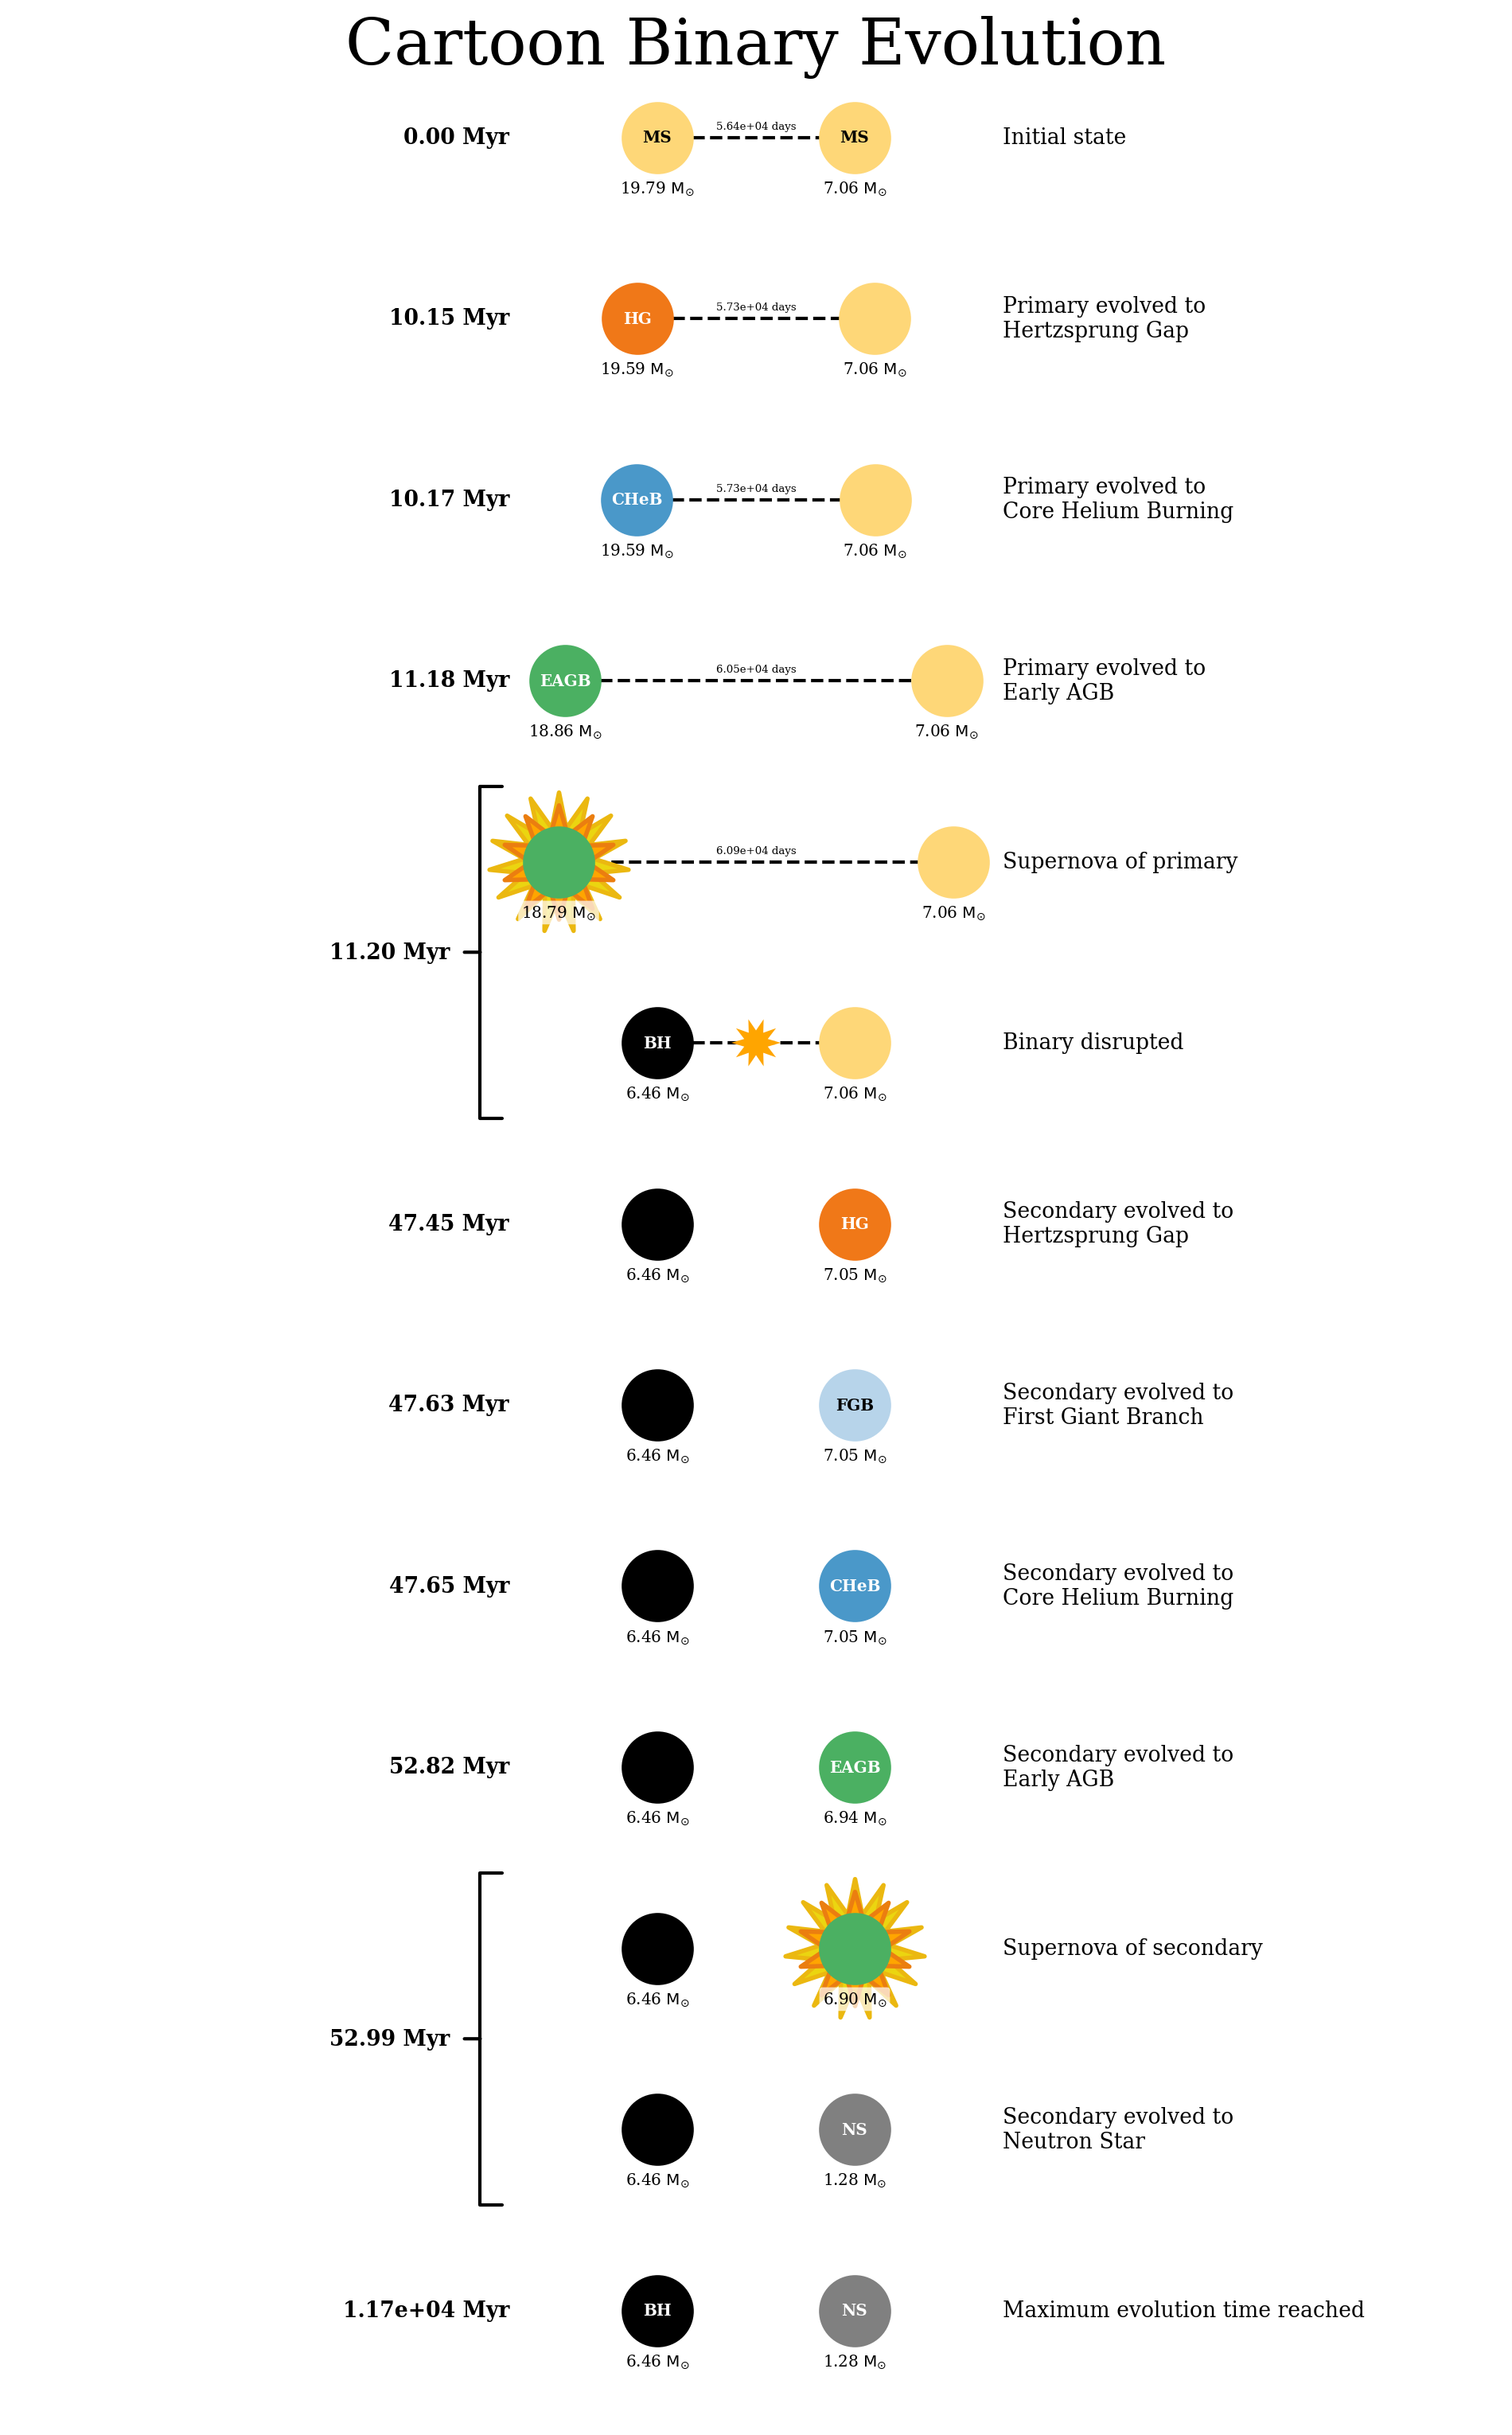

In [91]:
fig, ax = p.plot_cartoon_binary(bin_num=most_massive, show=False)
plt.savefig("../docs/_static/astronuc/cartoon_binary.png", bbox_inches="tight", dpi=300)
plt.show()

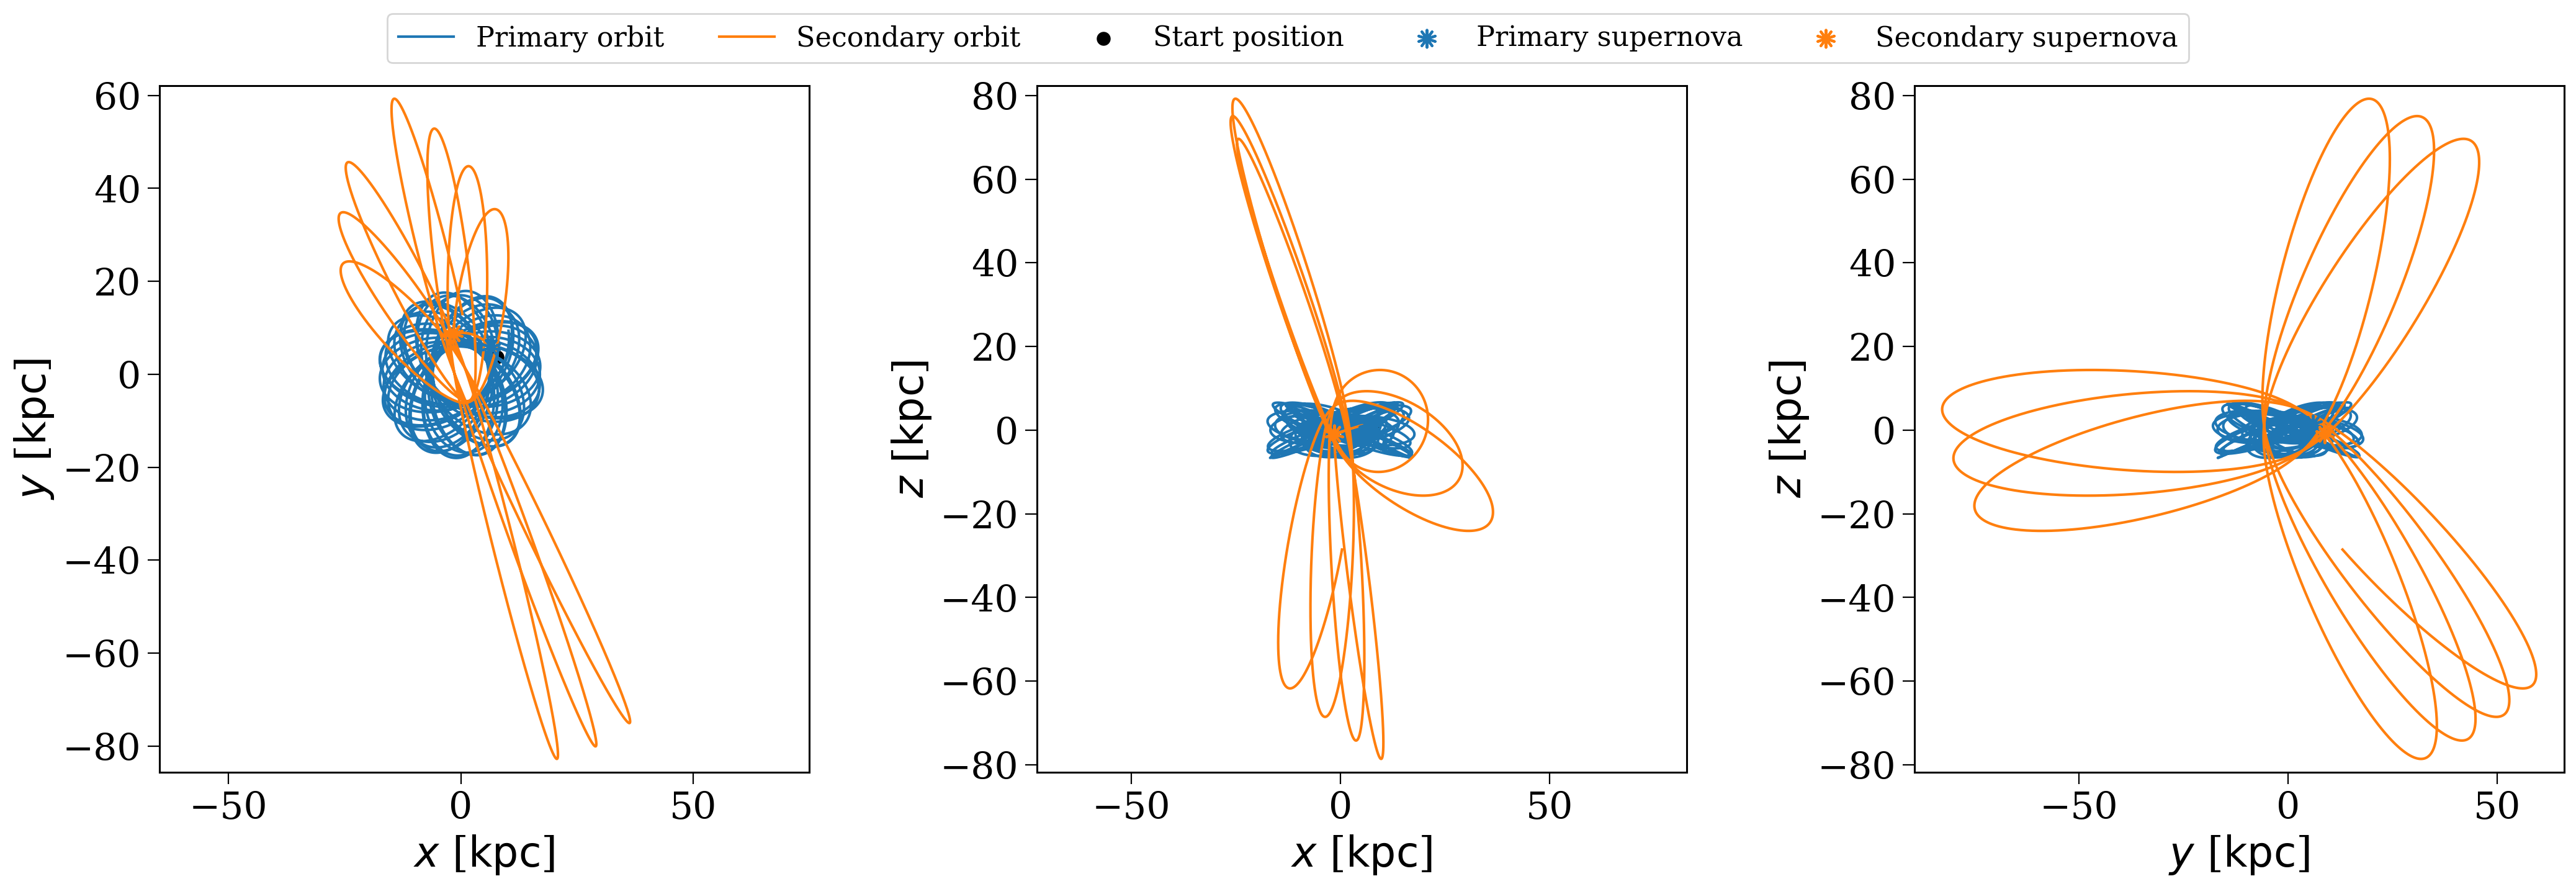

In [92]:
fig, axes = p.plot_orbit(bin_num=most_massive, show=False)
plt.savefig("../docs/_static/astronuc/orbit_full.png", bbox_inches="tight", dpi=300)
plt.show()

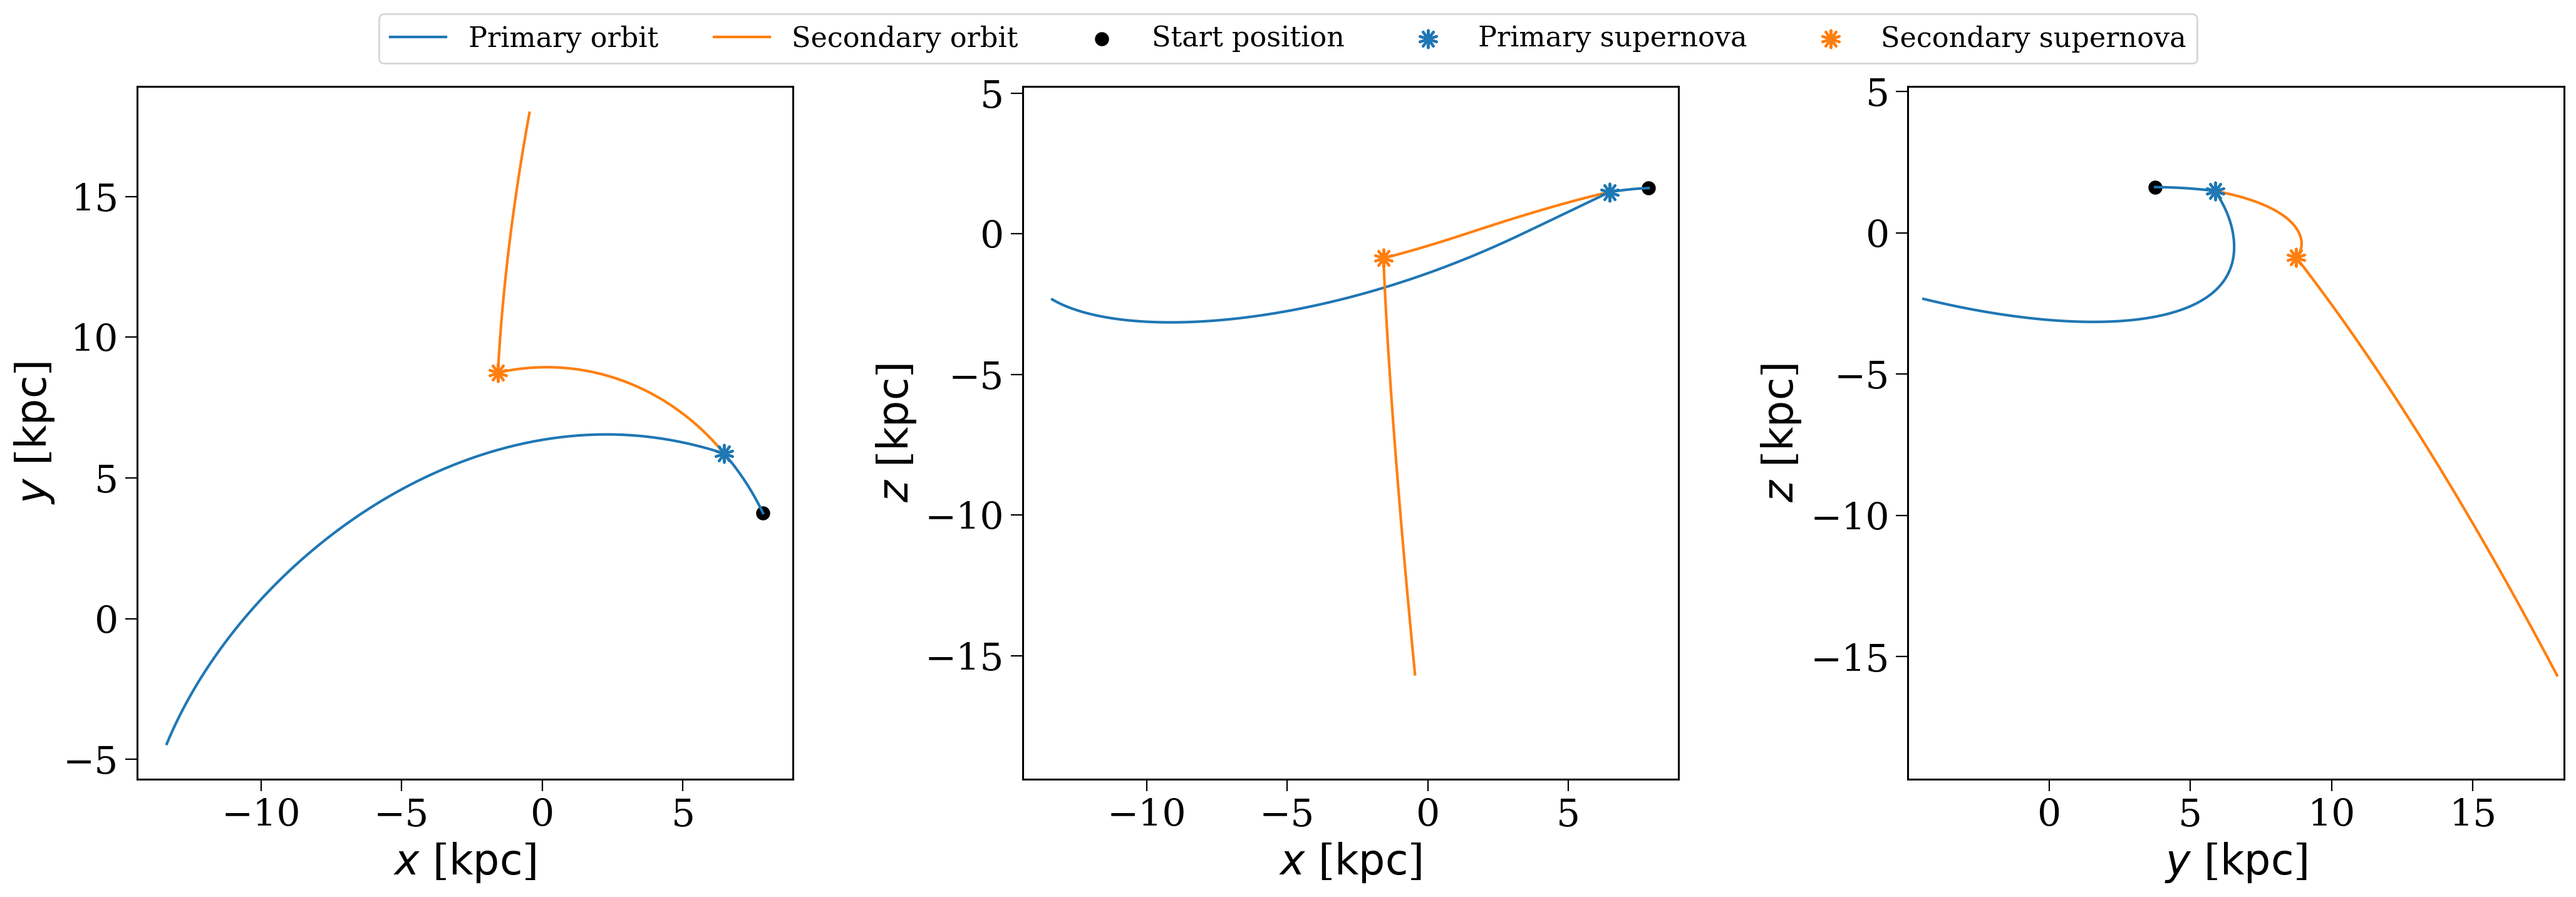

In [93]:
fig, axes = p.plot_orbit(bin_num=most_massive, t_max=100 * u.Myr, show=False)
plt.savefig("../docs/_static/astronuc/orbit_zoom.png", bbox_inches="tight", dpi=300)
plt.show()

## Tasks

# Part 2: Selecting subpopulations of interest

In [106]:
p = cogsworth.pop.Population(
    n_binaries=10000,
    use_default_BSE_settings=True
)
p.create_population()

Run for 10000 binaries
Ended up with 13325 binaries with m1 > 0 solar masses
[5e-02s] Sample initial binaries
[2.6s] Evolve binaries (run COSMIC)


13367it [00:37, 355.48it/s]                           


[51.1s] Get orbits (run gala)
Overall: 53.7s


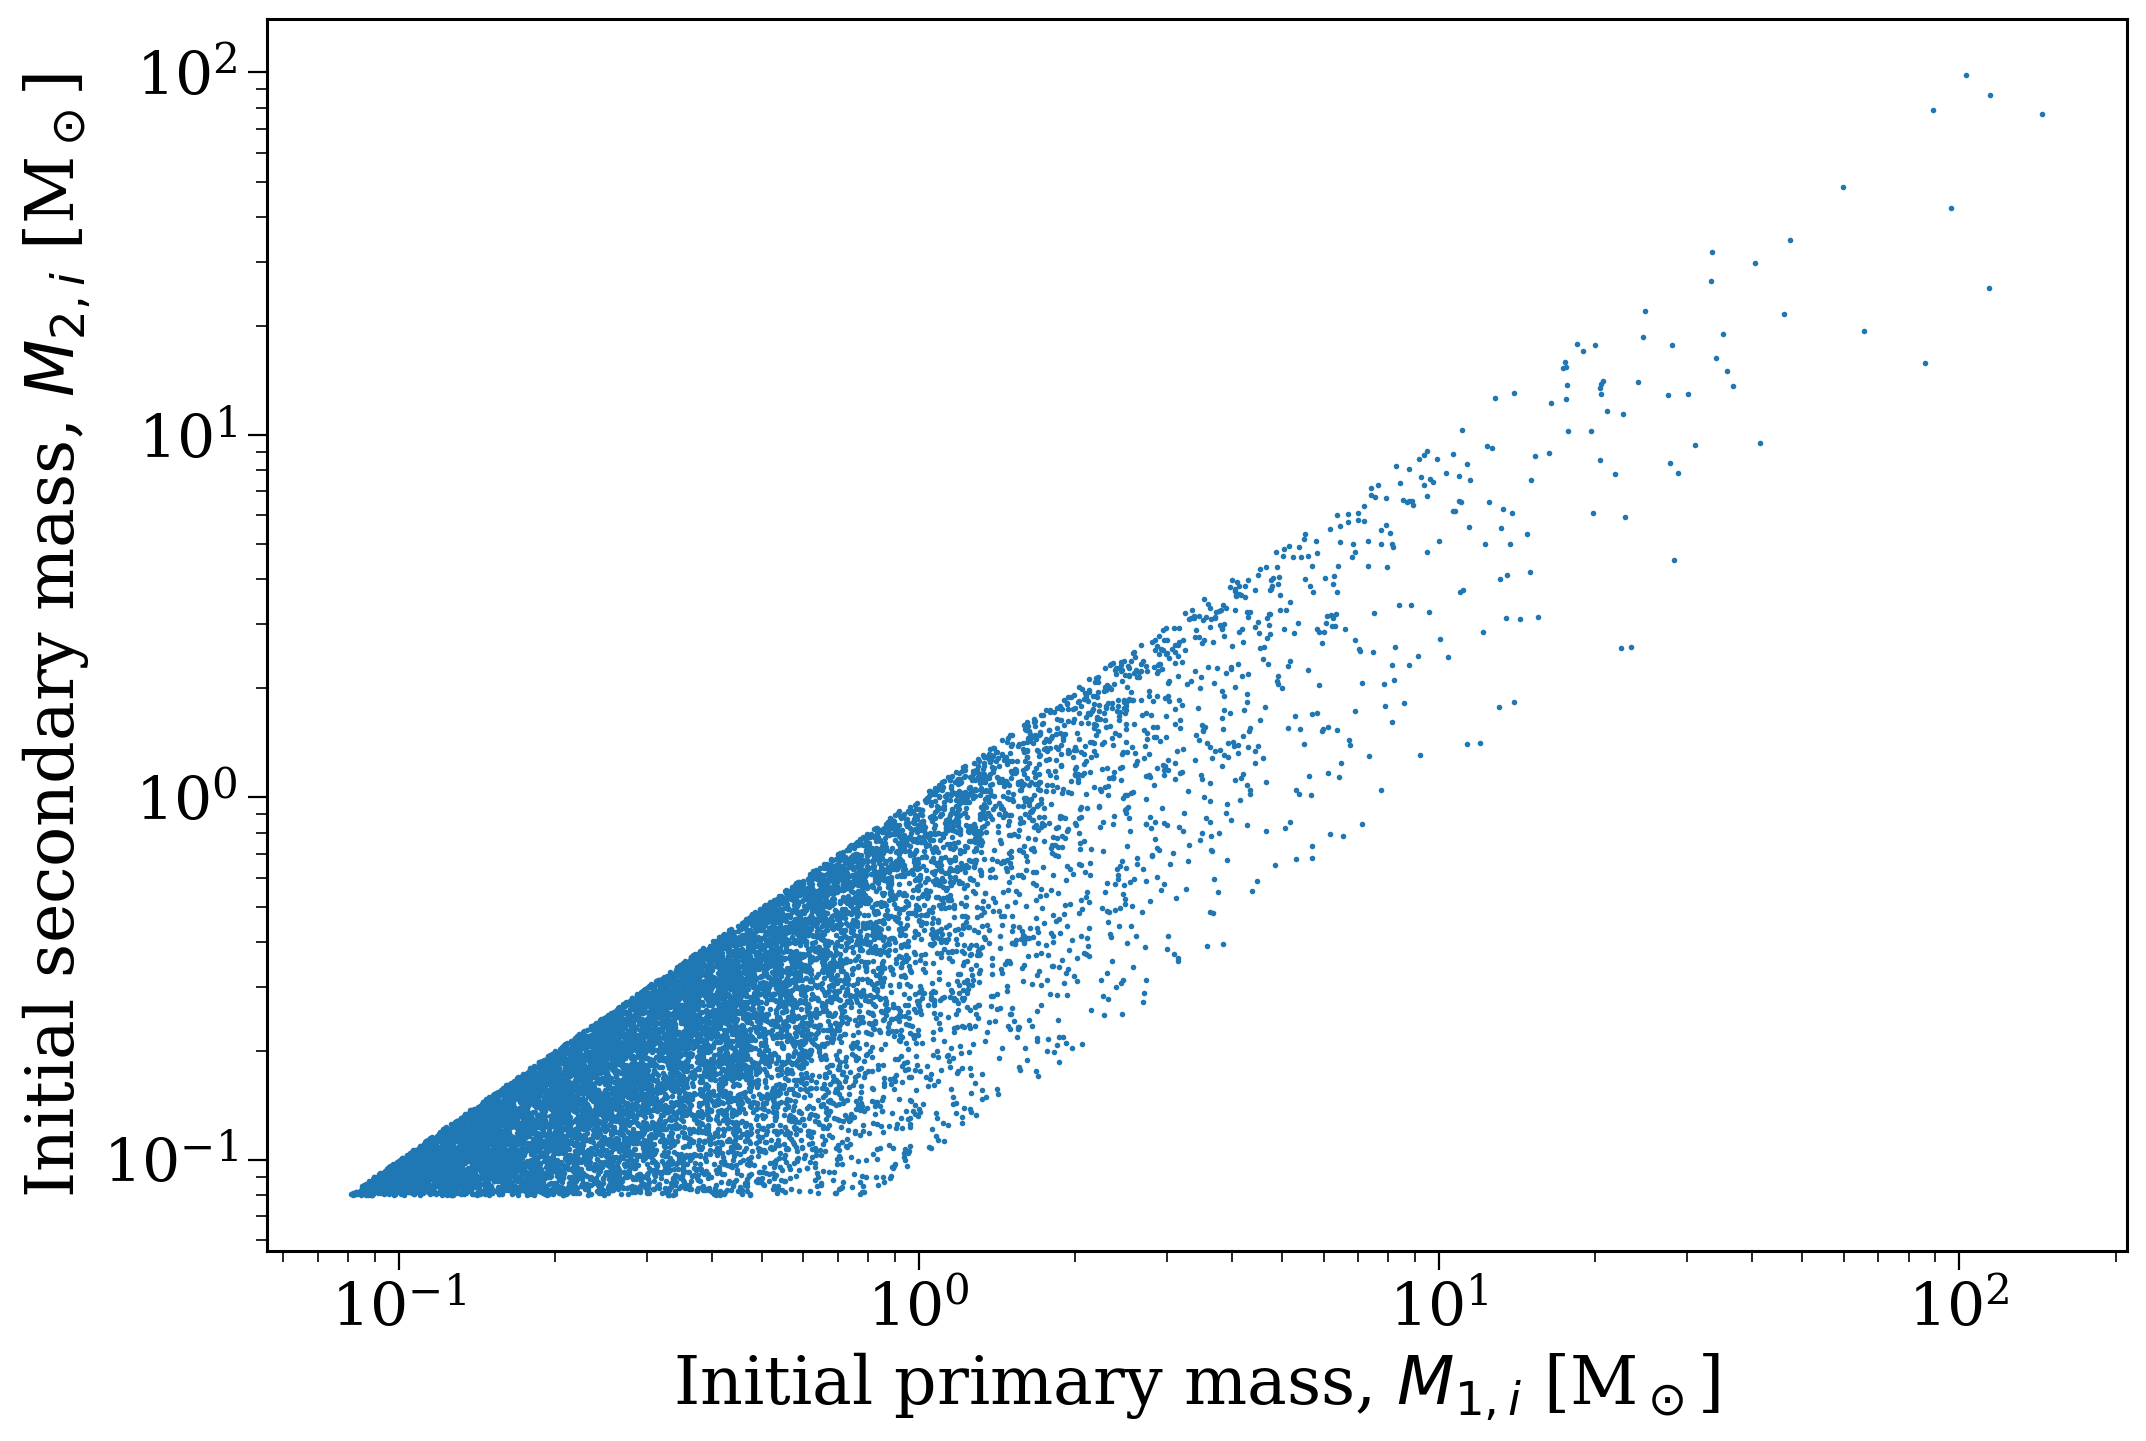

In [128]:
fig, ax = plt.subplots()
ax.scatter(p.initial_binaries["mass_1"], p.initial_binaries["mass_2"], s=1, rasterized=True)

ax.set(
    xscale="log",
    yscale="log",
    xlabel="Initial primary mass, $M_{1, i}$ [M$_\odot$]",
    ylabel="Initial secondary mass, $M_{2, i}$ [M$_\odot$]",
)
plt.savefig("../docs/_static/astronuc/initial_masses.png", bbox_inches="tight", dpi=300)
plt.show()

In [108]:
mass_ratio_mask = (p.initial_binaries["mass_2"] / p.initial_binaries["mass_1"]) < 0.5

In [109]:
selected_bin_nums = p.bin_nums[mass_ratio_mask]
print(selected_bin_nums)

[    1     2     4 ... 13313 13315 13317]


In [110]:
# mask with bin_nums
new_pop = p[selected_bin_nums]

In [111]:
# mask with boolean array with same length as p.bin_nums
new_pop = p[mass_ratio_mask]

In [112]:
# how many binaries met this?
print(len(new_pop))

# range of mass ratios in this population
q = new_pop.initial_binaries["mass_2"] / new_pop.initial_binaries["mass_1"]
print(q.min(), q.max())

3912
0.10009815249614316 0.4998838567589222


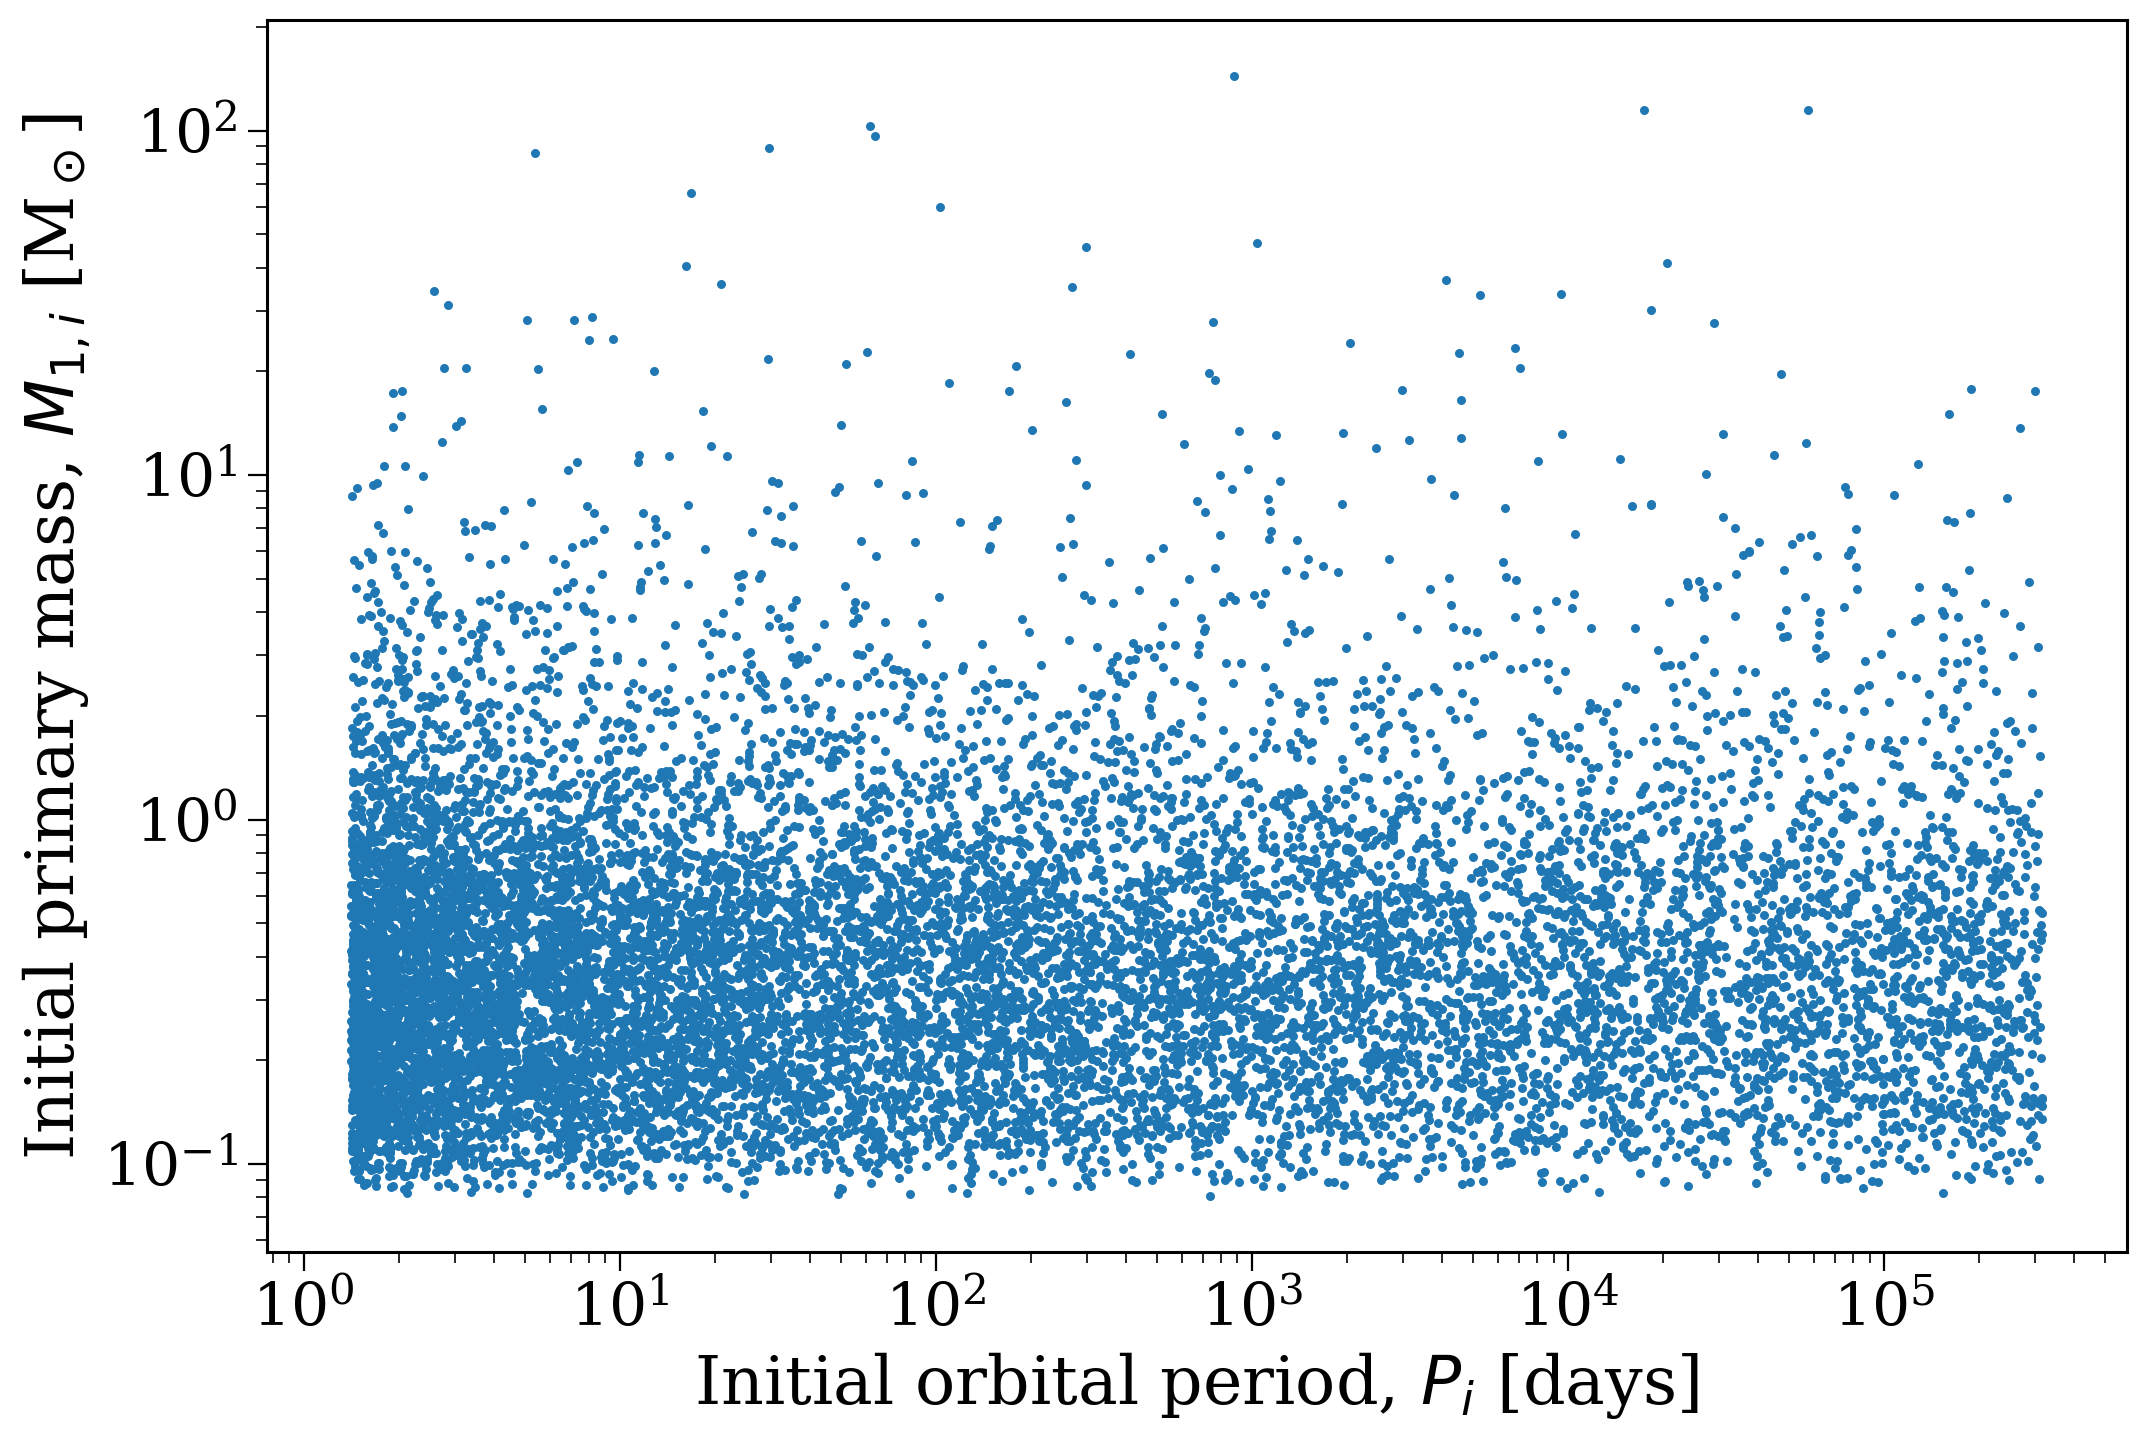

In [115]:
fig, ax = plt.subplots()
ax.scatter(p.initial_binaries["porb"], p.initial_binaries["mass_1"], s=5)
ax.set(
    xscale="log",
    yscale="log",
    xlabel="Initial orbital period, $P_i$ [days]",
    ylabel="Initial primary mass, $M_{1, i}$ [M$_\odot$]",
)
plt.show()

In [116]:
merger_nums = p.final_bpp["bin_num"][p.final_bpp["sep"] == 0]
merger_mask = np.isin(p.bin_nums, merger_nums)

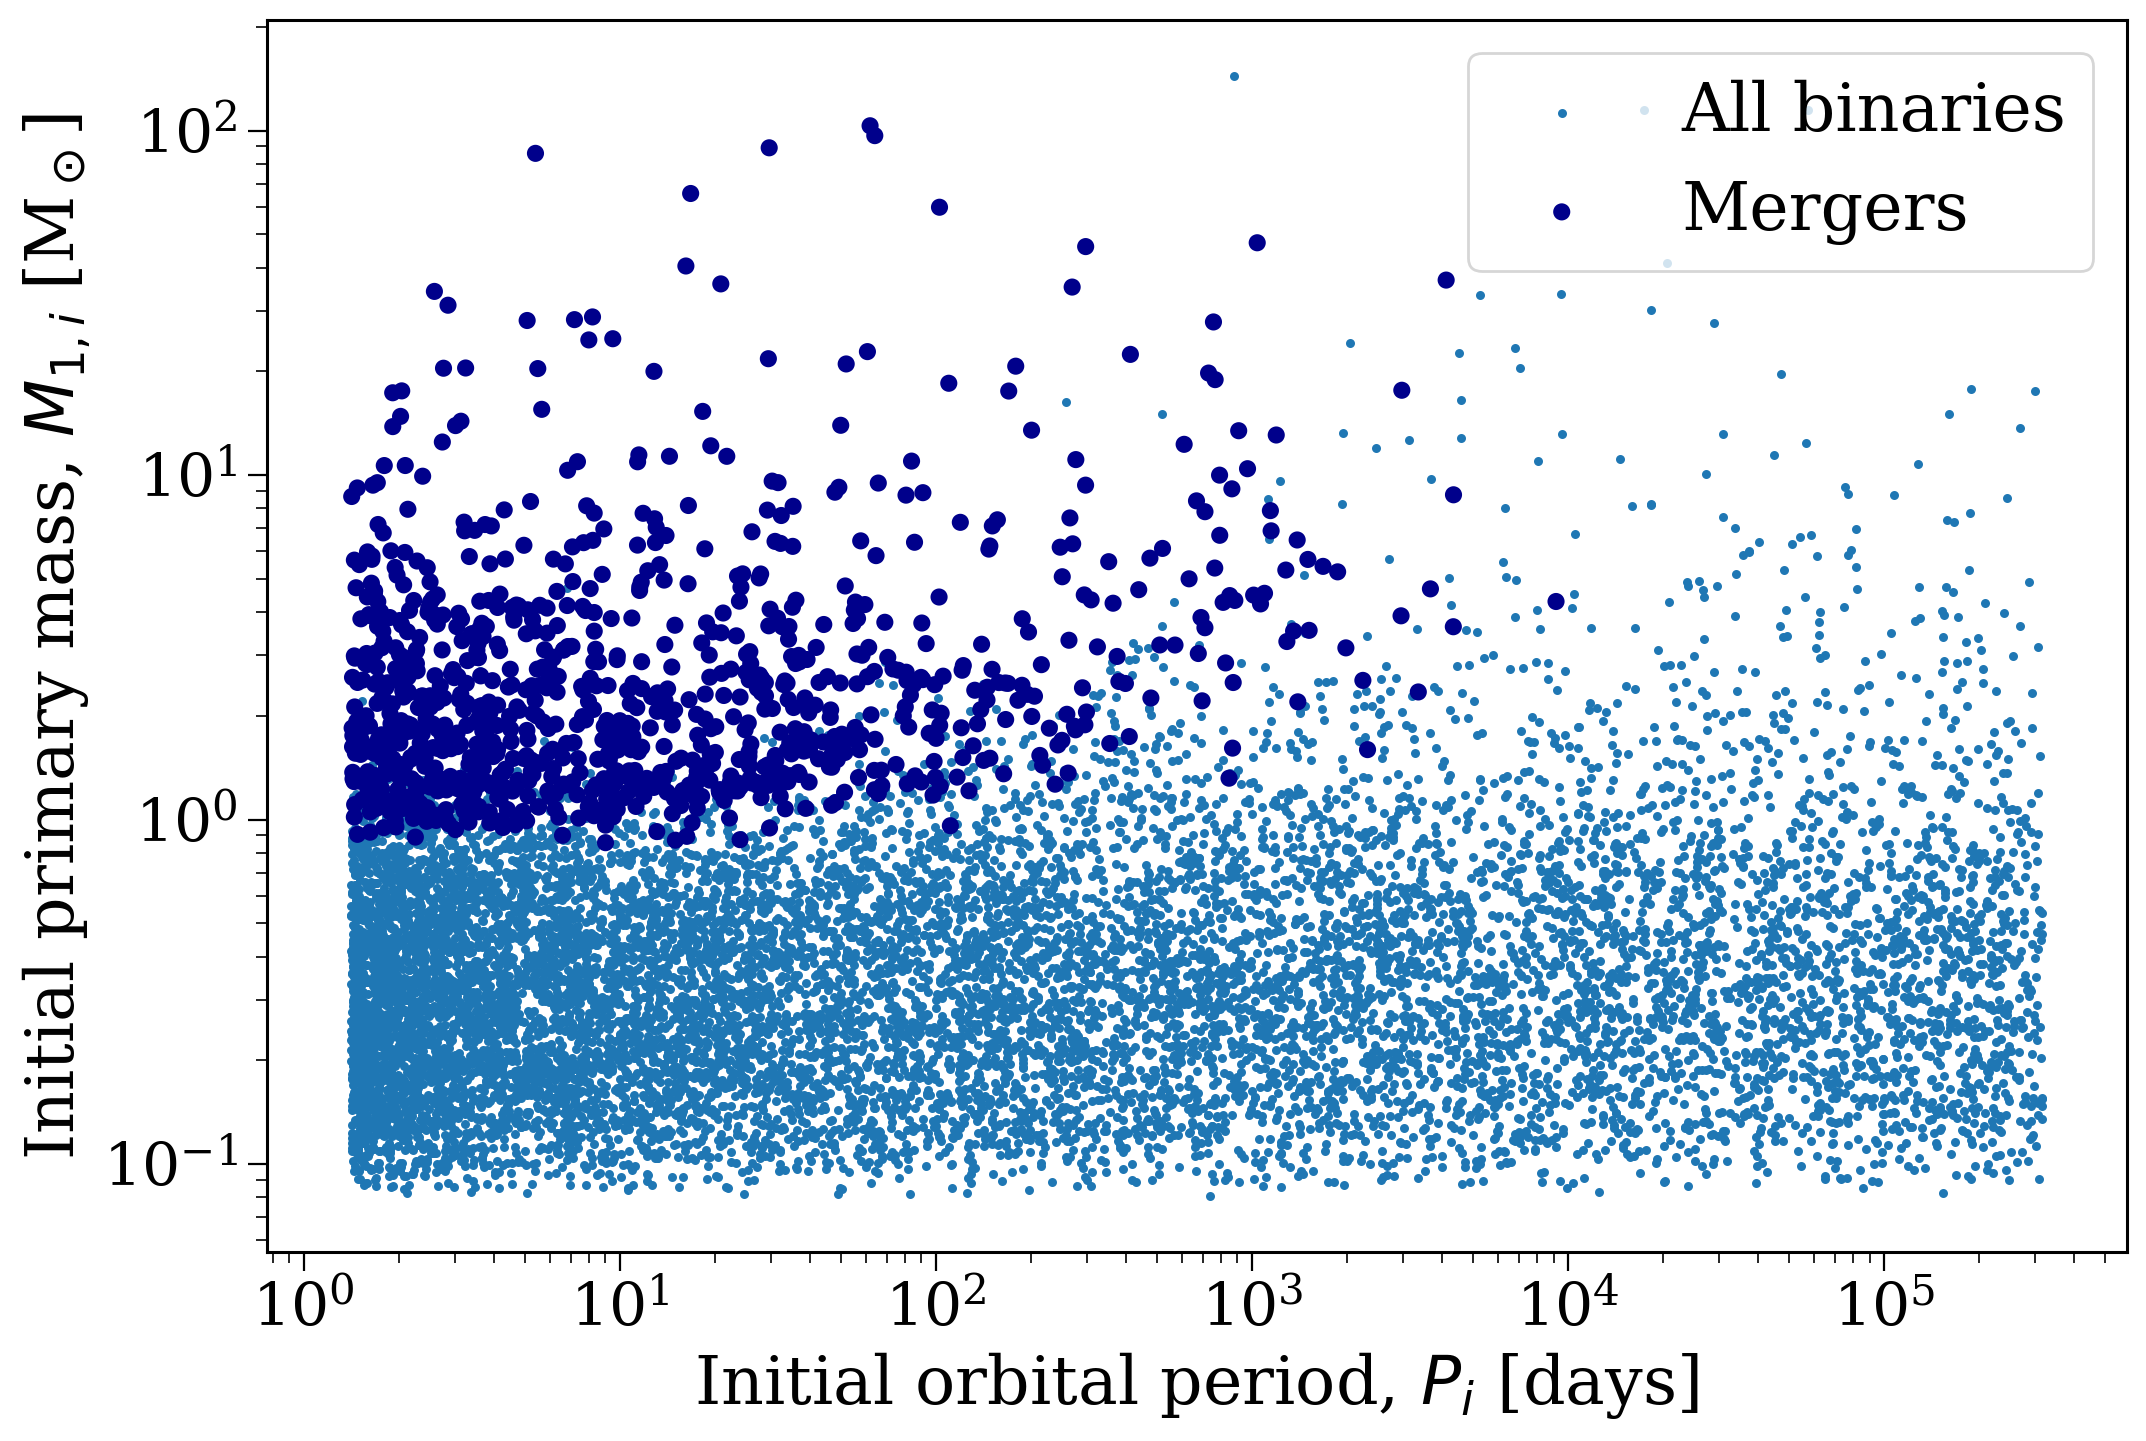

In [118]:
fig, ax = plt.subplots()
ax.scatter(p.initial_binaries["porb"], p.initial_binaries["mass_1"], s=5, label="All binaries")
ax.scatter(p.initial_binaries["porb"][merger_mask],
           p.initial_binaries["mass_1"][merger_mask],
           s=10, edgecolor="darkblue", linewidth=3, facecolor="none", label="Mergers")
ax.legend()
ax.set(
    xscale="log",
    yscale="log",
    xlabel="Initial orbital period, $P_i$ [days]",
    ylabel="Initial primary mass, $M_{1, i}$ [M$_\odot$]",
)
plt.show()

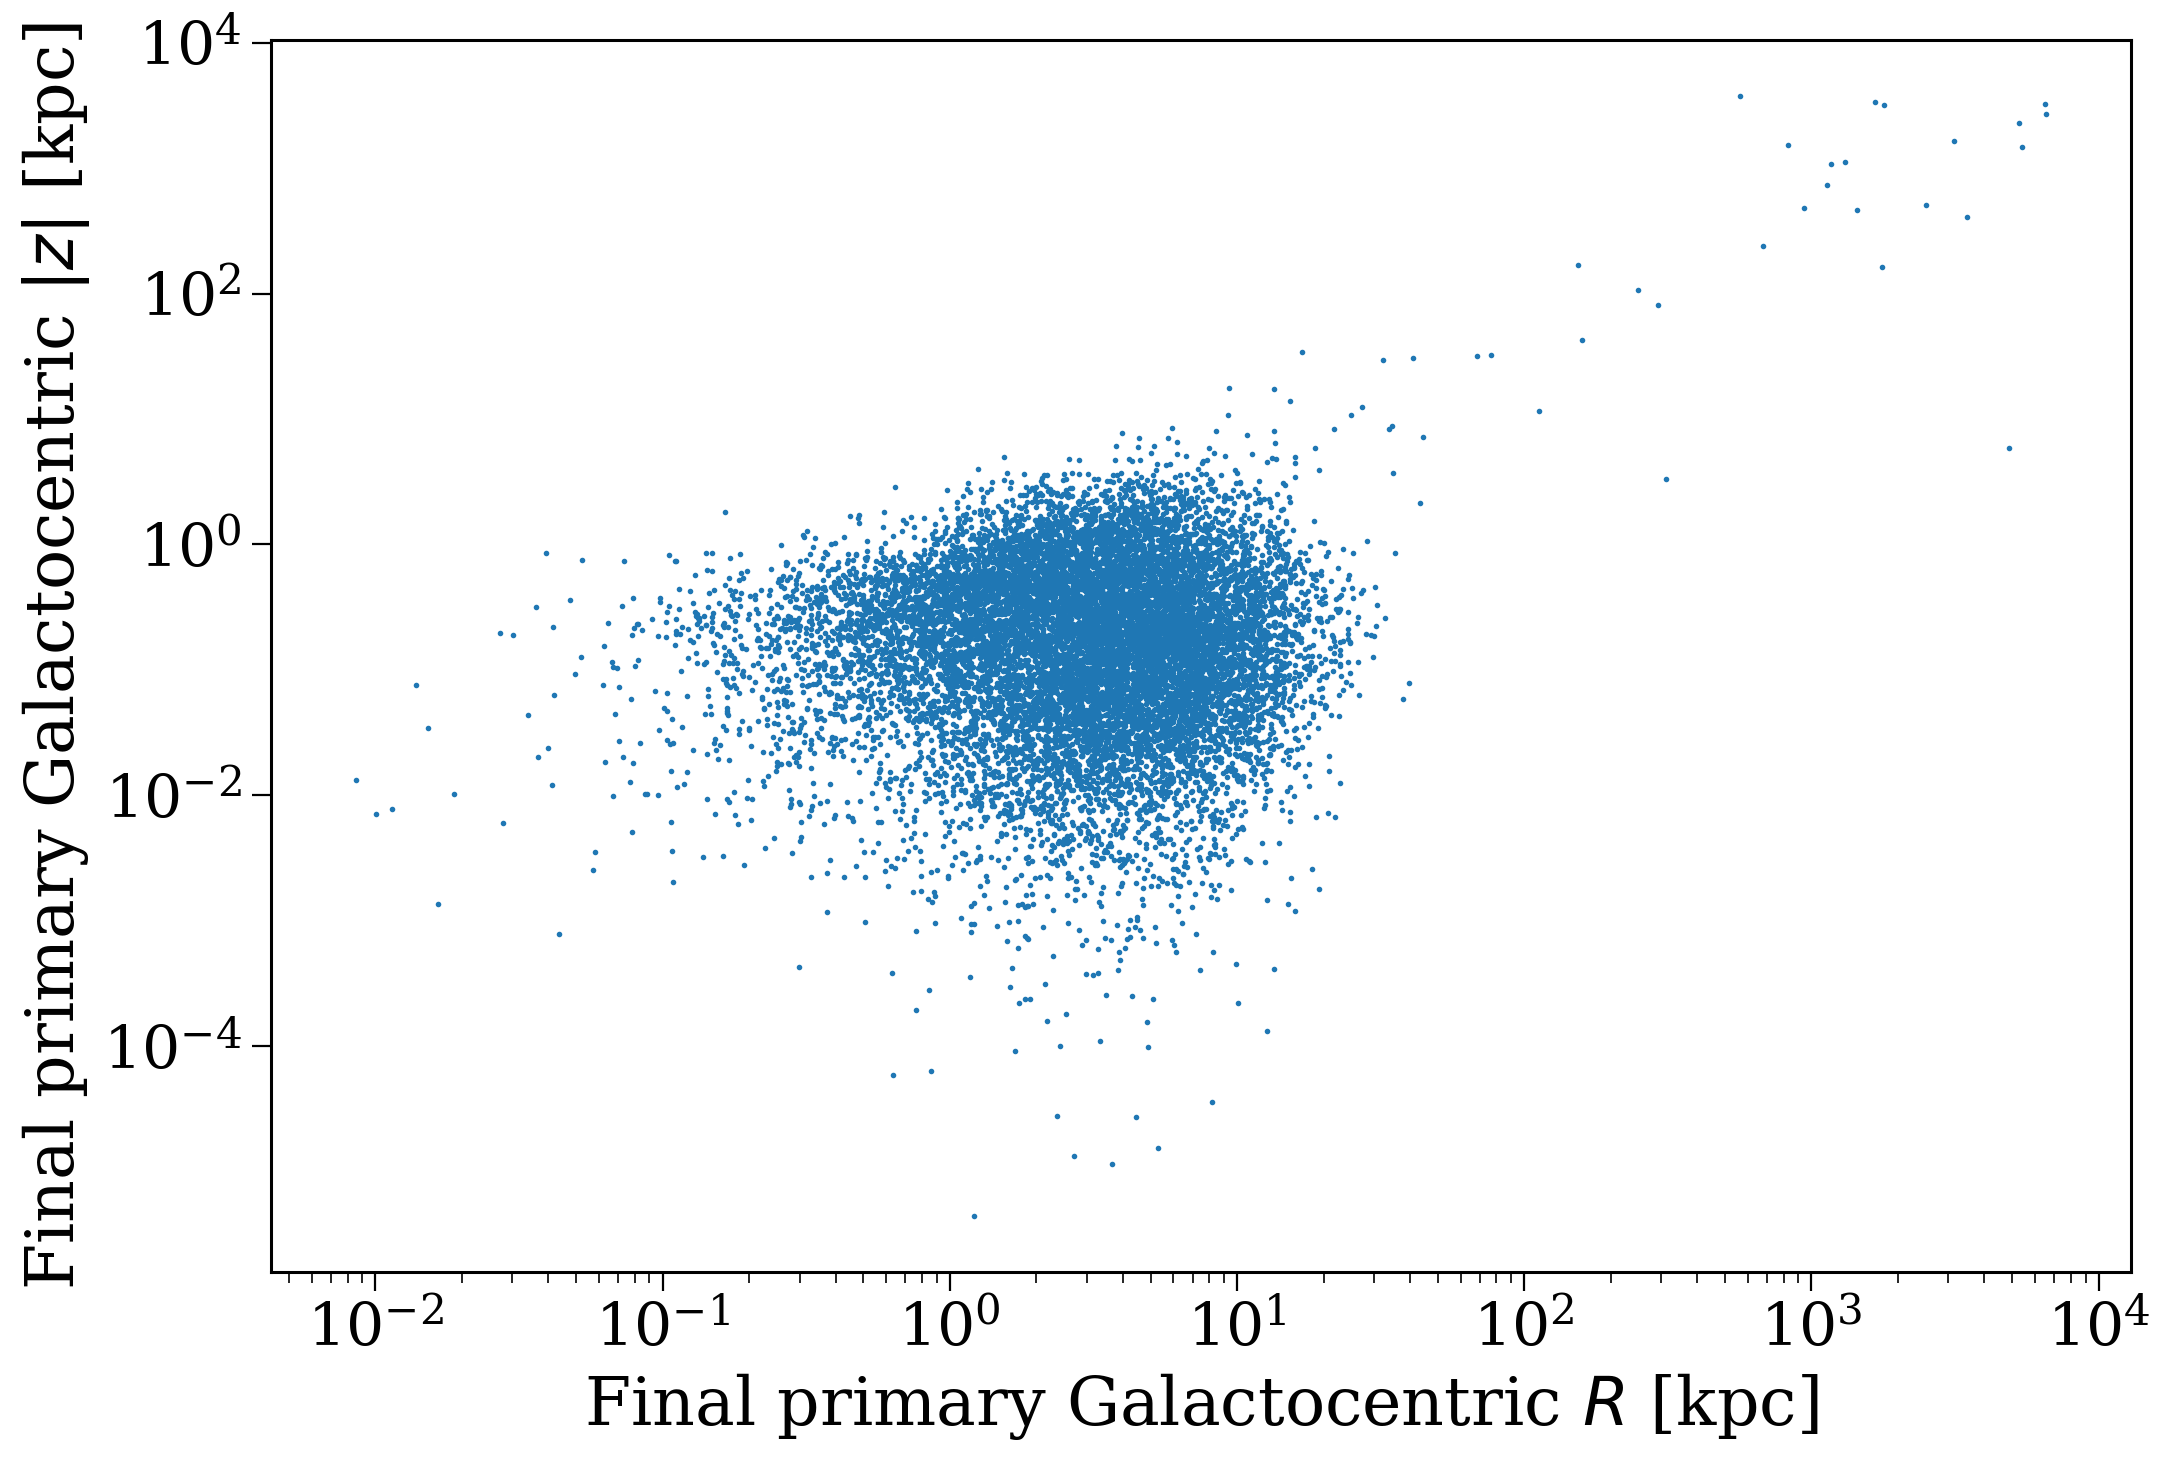

In [125]:
fig, ax = plt.subplots()
R = np.sqrt(p.final_primary_pos[:, 0] ** 2 + p.final_primary_pos[:, 1] ** 2)
abs_z = abs(p.final_primary_pos[:, 2])
ax.scatter(R, abs_z, s=1)
ax.set(
    xscale="log",
    yscale="log",
    xlabel="Final primary Galactocentric $R$ [kpc]",
    ylabel="Final primary Galactocentric $|z|$ [kpc]",
)
plt.show()

In [123]:
compact_object_mask = p.final_bpp["kstar_1"].isin([13, 14]) | p.final_bpp["kstar_2"].isin([13, 14])

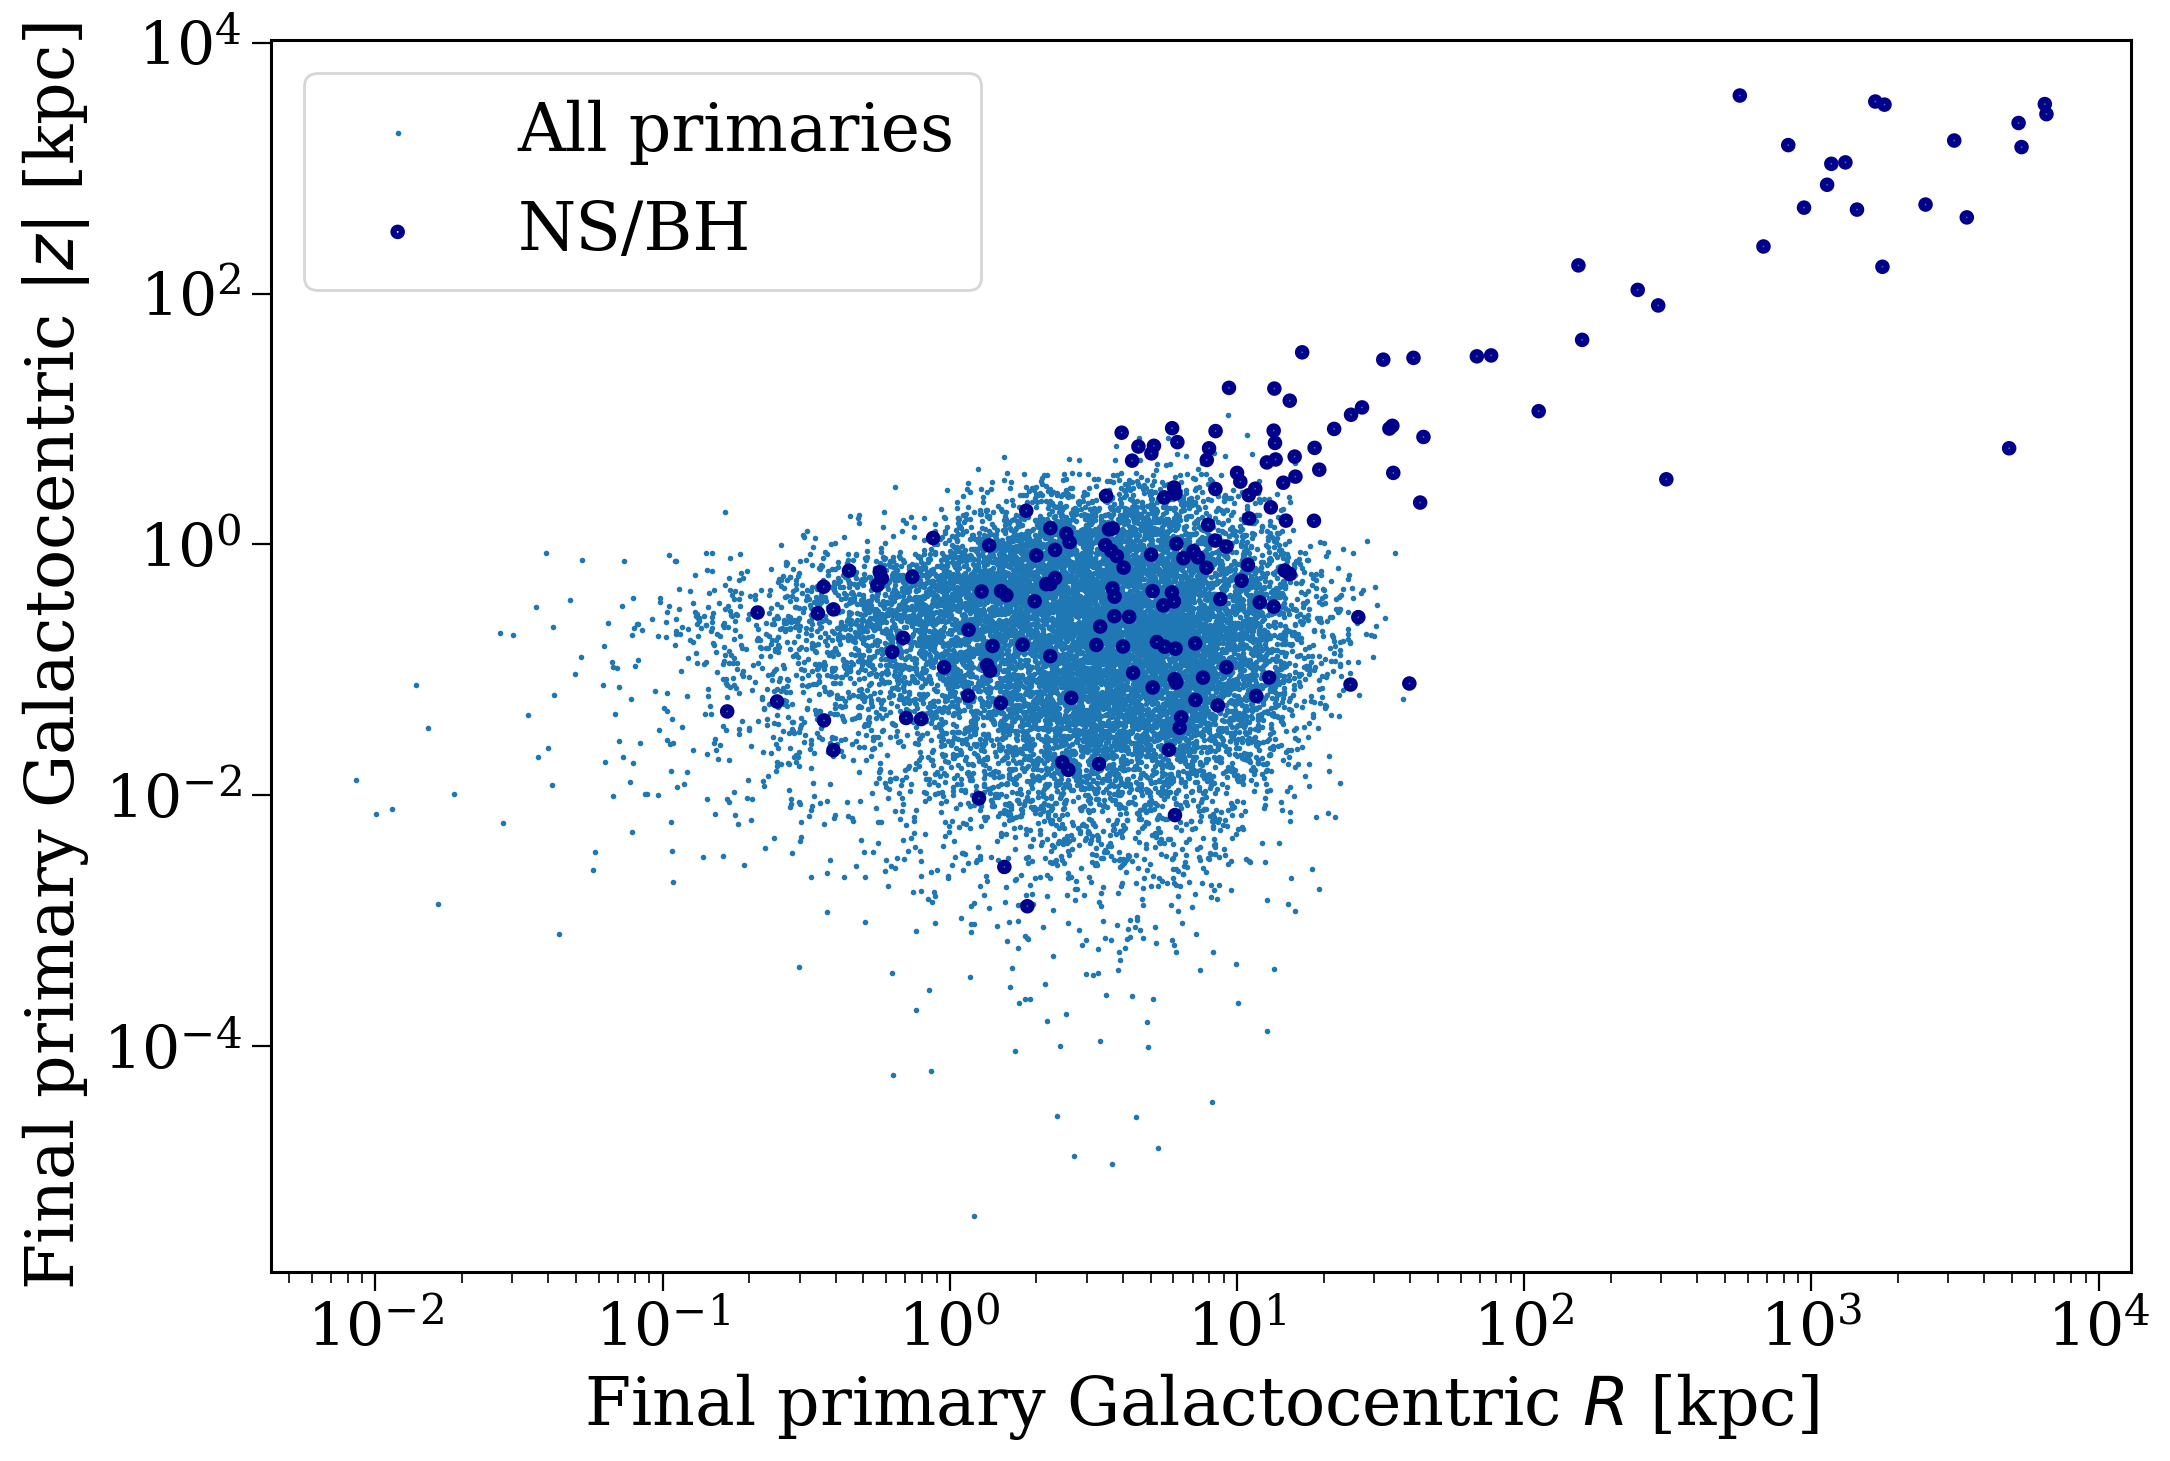

In [126]:
fig, ax = plt.subplots()
ax.scatter(R, abs_z, label="All primaries", s=1)
ax.scatter(
    R[compact_object_mask],
    abs_z[compact_object_mask],
    s=5, edgecolor="darkblue", linewidth=3, facecolor="none", label="NS/BH"
)
ax.legend()
ax.set(
    xscale="log",
    yscale="log",
    xlabel="Final primary Galactocentric $R$ [kpc]",
    ylabel="Final primary Galactocentric $|z|$ [kpc]",
)
plt.show()

# Part 3: Finding timing and location of SNe

# Part 4: Vary your assumptions

# Part 5: NSNS mergers